In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
#무게 예측

from sklearn.model_selection import train_test_split

perch_train, perch_test, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
perch_train = perch_train.reshape(-1,1)
perch_test = perch_test.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

In [7]:
knr.fit(perch_train, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
knr.score(perch_test, test_target)

0.9746459963987609

In [9]:
knr.predict([[50]])

array([1033.33333333])

In [10]:
distance, index = knr.kneighbors([[50]])

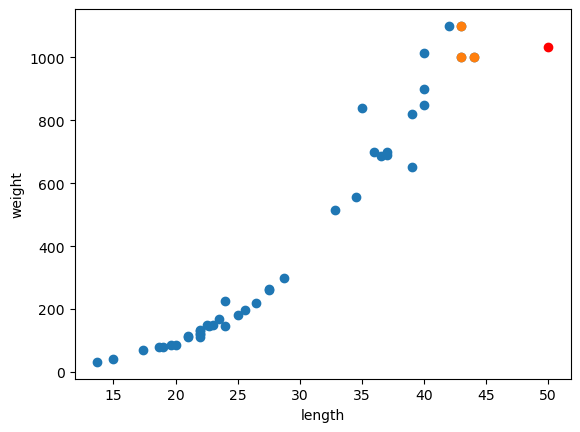

In [18]:
plt.scatter(perch_train, train_target)
plt.scatter(perch_train[index,], train_target[index])

plt.scatter(50, 1033, c='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
np.mean(train_target[index])

1033.3333333333333

In [23]:
knr.predict([[100]])

array([1033.33333333])

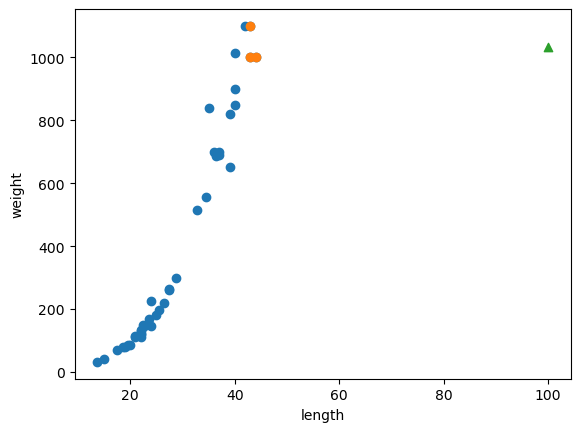

In [24]:
distance, index = knr.kneighbors([[100]])
plt.scatter(perch_train, train_target)
plt.scatter(perch_train[index], train_target[index])

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

lr.fit(perch_train,train_target)

lr.predict([[50]])

array([1241.83860323])

In [32]:
lr.coef_

array([39.01714496])

In [33]:
lr.intercept_

-709.0186449535477

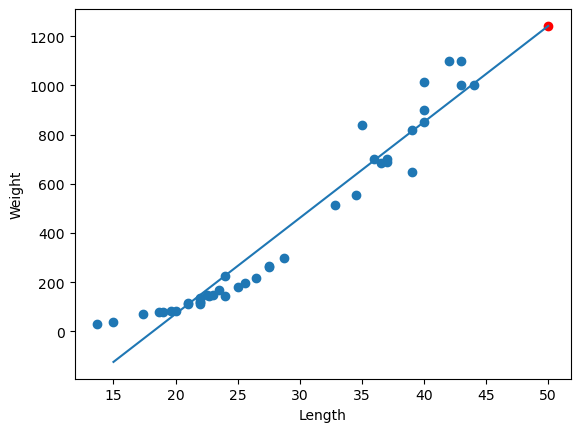

In [36]:
plt.scatter(perch_train, train_target)
plt.scatter(50, 1241.8, c='r')
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [38]:
lr.score(perch_train, train_target)

0.939846333997604

In [39]:
lr.score(perch_test, test_target)

0.8247503123313558

In [41]:
train_poly = np.column_stack((perch_train**2, perch_train))
test_poly = np.column_stack((perch_test**2, perch_test))

In [44]:
train_poly.shape

(42, 2)

In [45]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [47]:
lr=LinearRegression()

lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

array([1573.98423528])

In [48]:
lr.coef_

array([  1.01433211, -21.55792498])

In [49]:
lr.intercept_

116.05021078278259

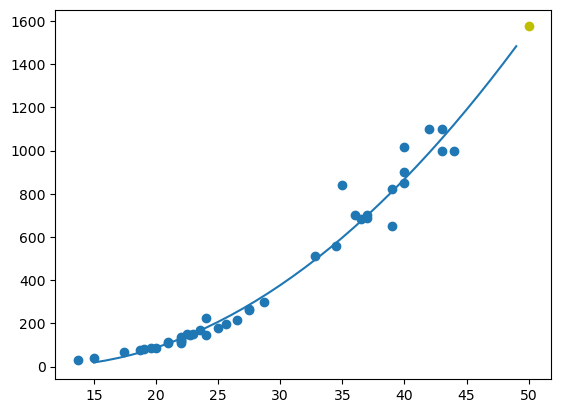

In [56]:
point =np.arange(15,50)

plt.scatter(perch_train, train_target)
plt.scatter(50, 1573.9, c='y')
plt.plot(point, 1.01*point**2-21.6*point + 116.0)
plt.show()